<a href="https://colab.research.google.com/github/mgmgc/AD-IA/blob/main/lab4AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

 1. In the first exercise you will use generate data() function from pyod.utils.data
 to generate a 3-dimensional dataset with 300 training samples and 200 test
 samples using a contamination of 0.15.
 2. You will fit an OCSVM model (from pyod.models.ocsvm) using the
 training data and then you will predict the labels for test data. Use the
 linear kernel and the contamination rate specified above. Compute the
 balanced accuracy and the ROC AUC for the test data

In [6]:
X_train, X_test, y_train, y_test = generate_data(
    n_train=300,
    n_test=200,
    n_features=3,
    contamination=0.15,
    random_state=42
)

model = OCSVM(kernel='linear', contamination=0.15)
model.fit(X_train)

y_train_pred = model.predict(X_train)
y_train_scores = model.decision_function(X_train)

y_test_pred = model.predict(X_test)
y_test_scores = model.decision_function(X_test)

bal_acc = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_scores)

print("BA:", bal_acc)
print("ROC-AUC:", roc_auc)


BA: 0.9833333333333334
ROC-AUC: 1.0


 3. Create 4 3D subplots where you will plot the test and training data (using
 different colors for inliers and outliers) for both the ground truth and the
 predicted labels

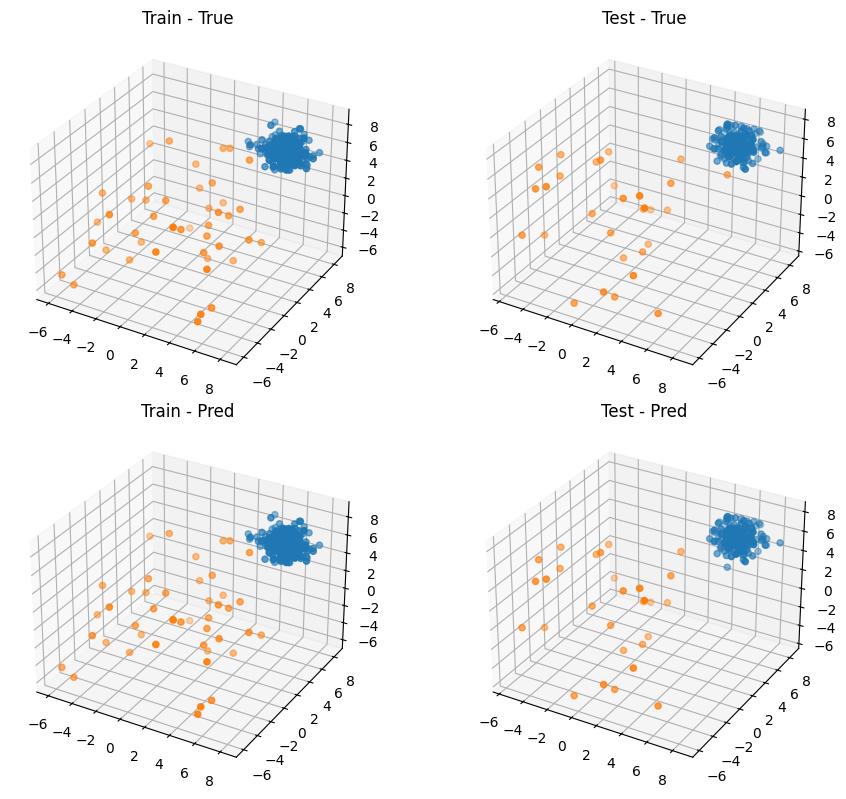

In [7]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.scatter(X_train[y_train==0,0], X_train[y_train==0,1], X_train[y_train==0,2], c='C0')
ax1.scatter(X_train[y_train==1,0], X_train[y_train==1,1], X_train[y_train==1,2], c='C1')
ax1.set_title("Train - True")

ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.scatter(X_test[y_test==0,0], X_test[y_test==0,1], X_test[y_test==0,2], c='C0')
ax2.scatter(X_test[y_test==1,0], X_test[y_test==1,1], X_test[y_test==1,2], c='C1')
ax2.set_title("Test - True")

ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.scatter(X_train[y_train_pred==0,0], X_train[y_train_pred==0,1], X_train[y_train_pred==0,2], c='C0')
ax3.scatter(X_train[y_train_pred==1,0], X_train[y_train_pred==1,1], X_train[y_train_pred==1,2], c='C1')
ax3.set_title("Train - Pred")

ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.scatter(X_test[y_test_pred==0,0], X_test[y_test_pred==0,1], X_test[y_test_pred==0,2], c='C0')
ax4.scatter(X_test[y_test_pred==1,0], X_test[y_test_pred==1,1], X_test[y_test_pred==1,2], c='C1')
ax4.set_title("Test - Pred")

plt.tight_layout()
plt.show()


 4. Observe how the predicted labels change when you use an RBF kernel.

In [9]:
model_rbf = OCSVM(kernel='rbf', contamination=0.15)
model_rbf.fit(X_train)

y_test_pred_rbf = model_rbf.predict(X_test)

diff = np.mean(y_test_pred_rbf != y_test_pred)
print("changed:", diff)

changed: 0.005


 5. Perform steps 2 and 3 for DeepSVDDmodelfrompyod.models.deep svdd

Epoch 1/50, Loss: 7.448348015546799
Epoch 2/50, Loss: 7.331944108009338
Epoch 3/50, Loss: 7.171354204416275
Epoch 4/50, Loss: 7.293254762887955
Epoch 5/50, Loss: 7.146872818470001
Epoch 6/50, Loss: 7.476613253355026
Epoch 7/50, Loss: 7.278925210237503
Epoch 8/50, Loss: 7.383703202009201
Epoch 9/50, Loss: 7.483821511268616
Epoch 10/50, Loss: 7.777280956506729
Epoch 11/50, Loss: 7.249851897358894
Epoch 12/50, Loss: 7.2824143171310425
Epoch 13/50, Loss: 7.676356881856918
Epoch 14/50, Loss: 7.779512822628021
Epoch 15/50, Loss: 7.134504050016403
Epoch 16/50, Loss: 8.135747730731964
Epoch 17/50, Loss: 7.309968858957291
Epoch 18/50, Loss: 7.1173897087574005
Epoch 19/50, Loss: 7.533168286085129
Epoch 20/50, Loss: 7.541270554065704
Epoch 21/50, Loss: 7.337622404098511
Epoch 22/50, Loss: 7.629990607500076
Epoch 23/50, Loss: 7.444979816675186
Epoch 24/50, Loss: 7.0786194652318954
Epoch 25/50, Loss: 7.529716908931732
Epoch 26/50, Loss: 7.73311348259449
Epoch 27/50, Loss: 7.228600263595581
Epoch 28

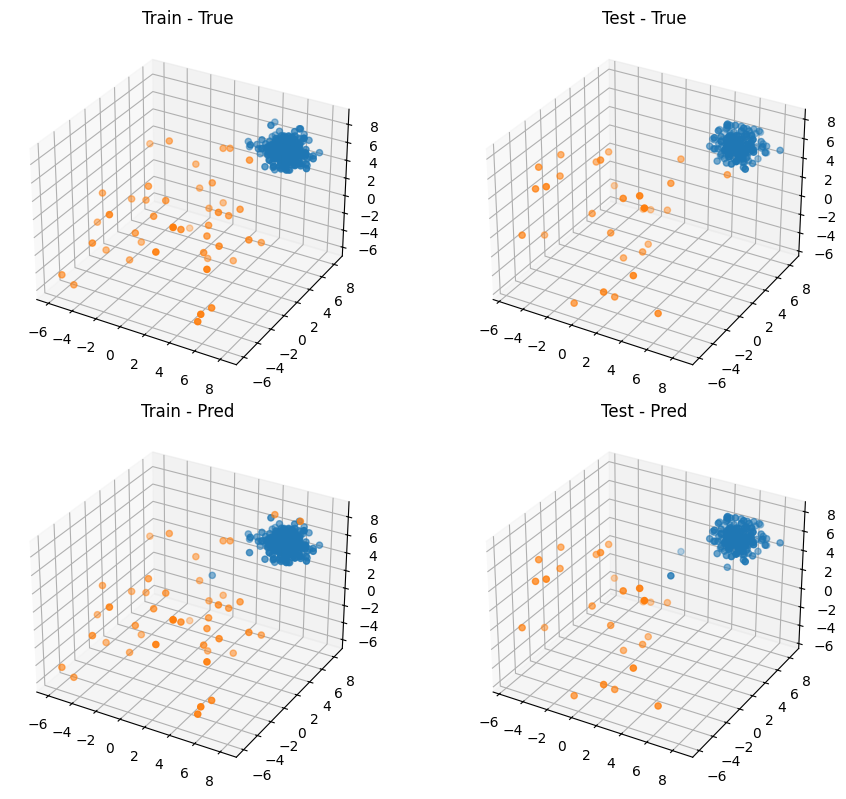

In [11]:
model_deep = DeepSVDD(
    n_features=X_train.shape[1],
    contamination=0.15,
    epochs=50
)
model_deep.fit(X_train)

y_train_pred_deep = model_deep.predict(X_train)
y_test_pred_deep = model_deep.predict(X_test)
y_test_scores_deep = model_deep.decision_function(X_test)

print("BA:", balanced_accuracy_score(y_test, y_test_pred_deep))
print("ROC-AUC:", roc_auc_score(y_test, y_test_scores_deep))

fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.scatter(X_train[y_train==0,0], X_train[y_train==0,1], X_train[y_train==0,2], c='C0')
ax1.scatter(X_train[y_train==1,0], X_train[y_train==1,1], X_train[y_train==1,2], c='C1')
ax1.set_title("Train - True")

ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.scatter(X_test[y_test==0,0], X_test[y_test==0,1], X_test[y_test==0,2], c='C0')
ax2.scatter(X_test[y_test==1,0], X_test[y_test==1,1], X_test[y_test==1,2], c='C1')
ax2.set_title("Test - True")

ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.scatter(X_train[y_train_pred_deep==0,0], X_train[y_train_pred_deep==0,1], X_train[y_train_pred_deep==0,2], c='C0')
ax3.scatter(X_train[y_train_pred_deep==1,0], X_train[y_train_pred_deep==1,1], X_train[y_train_pred_deep==1,2], c='C1')
ax3.set_title("Train - Pred")

ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.scatter(X_test[y_test_pred_deep==0,0], X_test[y_test_pred_deep==0,1], X_test[y_test_pred_deep==0,2], c='C0')
ax4.scatter(X_test[y_test_pred_deep==1,0], X_test[y_test_pred_deep==1,1], X_test[y_test_pred_deep==1,2], c='C1')
ax4.set_title("Test - Pred")

plt.tight_layout()
plt.show()

In [12]:
from scipy.io import loadmat

 1. In this exercise you will use the cardio dataset from ODDS (https://
 odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/). You will split
 the dataset into a training set consisting of 40% of the data and a testing
 set.
 2. You will use a cross-validation grid-search over a predefined map of pos
sible parameters of OneClassSVM (from sklearn.svm) in order to find
 the ones that offer best results. The map of possible parameters must
 contain different kernels, different values for gamma parameter (for ker
nels that use it) and different values for the ν parameter (including the
 contamination rate of train set).
 3. GridSearchCV from sklearn.model selection will be used to perform the
 grid-search over the training set using Balanced Accuracy as score. The
 same metric will be reported for the model trained with the best param
eters discovered by GridSearchCV (tested on the test set).
 4. GridSearchCV will have to perform standardization; for this, it will
 use a Pipeline from sklearn.pipeline that will perform standardization
 using StandardScaler before fitting the OneClassSVM model.
 5. Youhavetopayattention to the labels returned by OneClassSVM model
 (from sklearn):-1 for outliers and 1 for inliers. If you want to convert
 them to the pyod format you can use
 label pyod = (−1∗label sklearn +1)/2
 In the current exercise you will perform the conversion from pyod format
 to sklearn for the ground truth labels
 6. Print the best parameters discovered by GridSearchCV and the bal
anced accuracy obtained by the model (trained with those parameters on
 the entire training dataset) when evaluating the testing set.

In [14]:
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, make_scorer

data = loadmat("cardio.mat")
X = data["X"]
y_pyod = data["y"].ravel().astype(int)

X_train, X_test, y_py_train, y_py_test = train_test_split(
    X, y_pyod, test_size=0.6, random_state=42, stratify=y_pyod
)

y_train = 1 - 2 * y_py_train
y_test = 1 - 2 * y_py_test

cont_train = y_py_train.mean()

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ocsvm", OneClassSVM())
])

param_grid = {
    "ocsvm__kernel": ["linear","sigmoid"],
    "ocsvm__gamma": [0.01, 0.1],
    "ocsvm__nu": [0.05,0.1]
}

scorer = make_scorer(balanced_accuracy_score)

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV BA:", grid.best_score_)

best_model = grid.best_estimator_
y_test_pred = best_model.predict(X_test)

ba_test = balanced_accuracy_score(y_test, y_test_pred)
print("Test BA (best model):", ba_test)


Best params: {'ocsvm__gamma': 0.1, 'ocsvm__kernel': 'sigmoid', 'ocsvm__nu': 0.1}
Best CV BA: 0.7532069203238324
Test BA (best model): 0.7342577286287029


 1. For this exercise we will need to download the shuttle dataset from ODDS
 (https://odds.cs.stonybrook.edu/shuttle-dataset/). Load the data
 using scipy.io.loadmat() and use train test split() to split it into train
 and test subsets (use 50% of data for testing). Normalize your data ac
cordingly.
 2. Fit OCSVM and DeepSVDD models (from pyod) using the train
ing data and compute the balanced accuracy (BA) and the area un
der the curve for the testing data for both models (ROC AUC- using
 sklearn.metrics.roc auc score).
 3. Use different architectures for DeepSVDD and compute the 2 aforemen
tioned metrics for each case

In [16]:
data = loadmat("shuttle.mat")
X = data["X"]
y = data["y"].ravel().astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

cont = y_train.mean()

ocsvm = OCSVM(kernel="rbf", contamination=cont)
ocsvm.fit(X_train_s)
y_test_pred = ocsvm.predict(X_test_s)
scores = ocsvm.decision_function(X_test_s)

print("OCSVM BA:", balanced_accuracy_score(y_test, y_test_pred))
print("OCSVM ROC-AUC:", roc_auc_score(y_test, scores))


OCSVM BA: 0.974677190285512
OCSVM ROC-AUC: 0.9913999442541555


In [20]:
model = DeepSVDD(
    n_features=X_train_s.shape[1],
    contamination=cont,
    hidden_neurons=[32,64],
    epochs=50,
    random_state=42,
    verbose=0
    )
model.fit(X_train_s)
y_test_pred = model.predict(X_test_s)
scores = model.decision_function(X_test_s)
ba = balanced_accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, scores)
print("BA:", ba)
print("ROC-AUC:", auc)

Epoch 1/50, Loss: 1239.1831643879414
Epoch 2/50, Loss: 1239.0781546533108
Epoch 3/50, Loss: 1241.9679193496704
Epoch 4/50, Loss: 1238.9082290828228
Epoch 5/50, Loss: 1239.1649823486805
Epoch 6/50, Loss: 1238.719920180738
Epoch 7/50, Loss: 1238.9804418385029
Epoch 8/50, Loss: 1238.918825417757
Epoch 9/50, Loss: 1238.8236587792635
Epoch 10/50, Loss: 1238.9113436341286
Epoch 11/50, Loss: 1240.2081645727158
Epoch 12/50, Loss: 1239.1789650321007
Epoch 13/50, Loss: 1238.956239193678
Epoch 14/50, Loss: 1238.7879085093737
Epoch 15/50, Loss: 1239.0695486664772
Epoch 16/50, Loss: 1239.1445492208004
Epoch 17/50, Loss: 1239.402527242899
Epoch 18/50, Loss: 1239.6446889340878
Epoch 19/50, Loss: 1240.3536550104618
Epoch 20/50, Loss: 1241.7830865383148
Epoch 21/50, Loss: 1238.8992477059364
Epoch 22/50, Loss: 1239.904818803072
Epoch 23/50, Loss: 1238.820977807045
Epoch 24/50, Loss: 1239.0416148900986
Epoch 25/50, Loss: 1239.197472423315
Epoch 26/50, Loss: 1241.888133853674
Epoch 27/50, Loss: 1241.21108

In [21]:
model = DeepSVDD(
    n_features=X_train_s.shape[1],
    contamination=cont,
    hidden_neurons=[32,64,128],
    epochs=50,
    random_state=42,
    verbose=0
    )
model.fit(X_train_s)
y_test_pred = model.predict(X_test_s)
scores = model.decision_function(X_test_s)
ba = balanced_accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, scores)
print("BA:", ba)
print("ROC-AUC:", auc)

Epoch 1/50, Loss: 452.5840768069029
Epoch 2/50, Loss: 451.7816280722618
Epoch 3/50, Loss: 447.59131094813347
Epoch 4/50, Loss: 444.9443765580654
Epoch 5/50, Loss: 455.9289036691189
Epoch 6/50, Loss: 457.78894402086735
Epoch 7/50, Loss: 450.0361011698842
Epoch 8/50, Loss: 435.30084832012653
Epoch 9/50, Loss: 440.38186559826136
Epoch 10/50, Loss: 437.0859367623925
Epoch 11/50, Loss: 459.33357782661915
Epoch 12/50, Loss: 457.34592930972576
Epoch 13/50, Loss: 469.1445080935955
Epoch 14/50, Loss: 460.03463776409626
Epoch 15/50, Loss: 455.61669903993607
Epoch 16/50, Loss: 466.6588369309902
Epoch 17/50, Loss: 452.31492548435926
Epoch 18/50, Loss: 453.37835174798965
Epoch 19/50, Loss: 460.47518614679575
Epoch 20/50, Loss: 457.6160334944725
Epoch 21/50, Loss: 446.33478900045156
Epoch 22/50, Loss: 448.60585694760084
Epoch 23/50, Loss: 460.99290082603693
Epoch 24/50, Loss: 459.48349913954735
Epoch 25/50, Loss: 450.1781926602125
Epoch 26/50, Loss: 449.51952408999205
Epoch 27/50, Loss: 466.20816659